<a href="https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/Embedding_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toy Data to test embedding theory

In [0]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import cosine

def plot_vectors(words, svectors, clusters):
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(svectors)
  
  dataframe = pd.DataFrame(data = principalComponents, columns = ['x', 'y'])

  sns.set_style("whitegrid")
  palette = sns.color_palette("gist_rainbow_r", max(clusters)+1)
  dataframe['colour'] = pd.Series([palette[cluster] for cluster in clusters])
    
  graph2=sns.regplot(data=dataframe, x="x", y="y", fit_reg=False, marker="+")
  [graph2.text(x, y, s,color=c) for x,y,s,c in zip(dataframe['x'],dataframe['y'],words,dataframe["colour"])]

def similar_words(vector1,vectors):
    return sorted([(cosine(vector1, vector2),word2) for word2,vector2 in vectors.items()])

In [0]:
clusters_idx = {
    "Ferrari":0,
    "Ford":0,
    "Skoda":0,
    "Car":1,
    "Motorbike":1,
    "Bus":1,
    "Vehicle":2,
    "Walking":3,
    "Jogging":3,
    "Foot transport":4,
    "Transportation":5,
}

In [0]:
edges = [
    ("Ferrari","Car"),
    ("Ford","Car"),
    ("Skoda","Car"),
    ("Car","Vehicle"),
    ("Motorbike","Vehicle"),
    ("Bus","Vehicle"),
    ("Walking","Foot transport"),
    ("Jogging","Foot transport"),
    ("Vehicle","Transportation"),
    ("Foot transport","Transportation"),
]

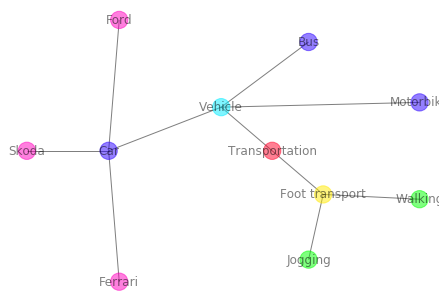

In [0]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(edges)
colours = [clusters_idx[node] for node in G.nodes]
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='twopi')
nx.draw(G, pos, node_color = colours, cmap = "gist_rainbow_r",  alpha=.5, with_labels=True)

# Directed Graphs

## Down Hierarchy 
The Child nodes for each word will be the boolean encoding for that word's vector

cons: only those higher in hierarchy are similar - is that what we want?  e.g. Ford vs Car will have relation but Ford vs Skoda share no relation.

[(0.0, 'Ferrari'),
 (0.5, 'Car'),
 (0.6220355269907727, 'Vehicle'),
 (0.6984886554222364, 'Transportation'),
 (1.0, 'Bus'),
 (1.0, 'Foot transport'),
 (1.0, 'Ford'),
 (1.0, 'Jogging'),
 (1.0, 'Motorbike'),
 (1.0, 'Skoda'),
 (1.0, 'Walking')]

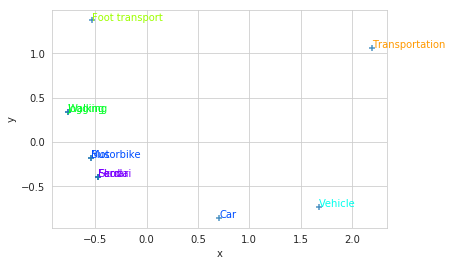

In [0]:
vectors = {
  "Ferrari":[1,0,0,0,0,0,0,0,0,0,0],
  "Ford":[0,1,0,0,0,0,0,0,0,0,0],
  "Skoda":[0,0,1,0,0,0,0,0,0,0,0],
  "Motorbike":[0,0,0,1,0,0,0,0,0,0,0],
  "Bus":[0,0,0,0,1,0,0,0,0,0,0],
  "Walking":[0,0,0,0,0,1,0,0,0,0,0],
  "Jogging":[0,0,0,0,0,0,1,0,0,0,0],
  "Car":[1,1,1,0,0,0,0,1,0,0,0],
  "Vehicle":[1,1,1,1,1,0,0,1,1,0,0],
  "Foot transport":[0,0,0,0,0,1,1,0,0,1,0],
  "Transportation":[1,1,1,1,1,1,1,1,1,1,1],
}
plot_vectors(vectors.keys(), list(vectors.values()),[clusters_idx[word] for word in vectors] )
similar_words(vectors["Ferrari"],vectors)

In [0]:
similar_words(vectors["Car"],vectors)

[(0.0, 'Car'),
 (0.2440710539815455, 'Vehicle'),
 (0.39697731084447274, 'Transportation'),
 (0.5, 'Ferrari'),
 (0.5, 'Ford'),
 (0.5, 'Skoda'),
 (1.0, 'Bus'),
 (1.0, 'Foot transport'),
 (1.0, 'Jogging'),
 (1.0, 'Motorbike'),
 (1.0, 'Walking')]

## Up-Down hierarchy
All nodes are listed.  For a given node, if another node is a child or parent node to it, it receives a 1. Gives preference to higher hierarchy first. Eg. car is more similar to vehicle than it is to ferrari

[(0.0, 'Ferrari'),
 (0.18350341907227397, 'Car'),
 (0.2500000000000001, 'Ford'),
 (0.2500000000000001, 'Skoda'),
 (0.29289321881345254, 'Vehicle'),
 (0.39697731084447274, 'Transportation'),
 (0.42264973081037416, 'Bus'),
 (0.42264973081037416, 'Motorbike'),
 (0.7113248654051871, 'Jogging'),
 (0.7113248654051871, 'Walking'),
 (0.75, 'Foot transport')]

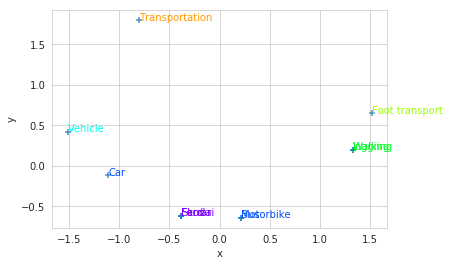

In [0]:
vectors = {
  "Ferrari":[1,0,0,0,0,0,0,1,1,0,1],
  "Ford":[0,1,0,0,0,0,0,1,1,0,1],
  "Skoda":[0,0,1,0,0,0,0,1,1,0,1],
  "Motorbike":[0,0,0,1,0,0,0,0,1,0,1],
  "Bus":[0,0,0,0,1,0,0,0,1,0,1],
  "Walking":[0,0,0,0,0,1,0,0,0,1,1],
  "Jogging":[0,0,0,0,0,0,1,0,0,1,1],
  "Car":[1,1,1,0,0,0,0,1,1,0,1],
  "Vehicle":[1,1,1,1,1,0,0,1,1,0,1],
  "Foot transport":[0,0,0,0,0,1,1,0,0,1,1],
  "Transportation":[1,1,1,1,1,1,1,1,1,1,1],
}
plot_vectors(vectors.keys(), list(vectors.values()),[clusters_idx[word] for word in vectors] )
similar_words(vectors["Ferrari"],vectors)

In [0]:
similar_words(vectors["Car"],vectors)

[(0.0, 'Car'),
 (0.1339745962155613, 'Vehicle'),
 (0.18350341907227397, 'Ferrari'),
 (0.18350341907227397, 'Ford'),
 (0.18350341907227397, 'Skoda'),
 (0.2614510541240037, 'Transportation'),
 (0.5285954792089682, 'Bus'),
 (0.5285954792089682, 'Motorbike'),
 (0.7642977396044841, 'Jogging'),
 (0.7642977396044841, 'Walking'),
 (0.7958758547680684, 'Foot transport')]

## Up Hierarchy
For each word include the node and all parent nodes as 1. Theory is that each word will have a unique parent chain. Similar results to up down hierarchy but Gives preference to Lower hierarchy first. E.g. car us more similar to Ferrari than to vehicle. Good for examples. Also More efficient encoding as vectors are less dense / sparse and better for storage. also more computationally efficient to compute parent nodes only

[(0.0, 'Ferrari'),
 (0.1339745962155613, 'Car'),
 (0.2500000000000001, 'Ford'),
 (0.2500000000000001, 'Skoda'),
 (0.29289321881345254, 'Vehicle'),
 (0.42264973081037416, 'Bus'),
 (0.42264973081037416, 'Motorbike'),
 (0.5, 'Transportation'),
 (0.6464466094067263, 'Foot transport'),
 (0.7113248654051871, 'Jogging'),
 (0.7113248654051871, 'Walking')]

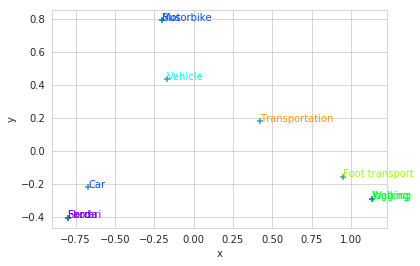

In [0]:
vectors = {
  "Ferrari":[1,0,0,0,0,0,0,1,1,0,1],
  "Ford": [0,1,0,0,0,0,0,1,1,0,1],
  "Skoda": [0,0,1,0,0,0,0,1,1,0,1],
  "Motorbike": [0,0,0,1,0,0,0,0,1,0,1],
  "Bus":  [0,0,0,0,1,0,0,0,1,0,1],
  "Walking": [0,0,0,0,0,1,0,0,0,1,1],
  "Jogging": [0,0,0,0,0,0,1,0,0,1,1],
  "Car": [0,0,0,0,0,0,0,1,1,0,1],
  "Vehicle": [0,0,0,0,0,0,0,0,1,0,1],
  "Foot transport": [0,0,0,0,0,0,0,0,0,1,1],
  "Transportation": [0,0,0,0,0,0,0,0,0,0,1],
}
plot_vectors(vectors.keys(), list(vectors.values()),[clusters_idx[word] for word in vectors] )
similar_words(vectors["Ferrari"],vectors)

In [0]:
similar_words(vectors["Car"],vectors)

[(0.0, 'Car'),
 (0.1339745962155613, 'Ferrari'),
 (0.1339745962155613, 'Ford'),
 (0.1339745962155613, 'Skoda'),
 (0.18350341907227397, 'Vehicle'),
 (0.33333333333333326, 'Bus'),
 (0.33333333333333326, 'Motorbike'),
 (0.42264973081037416, 'Transportation'),
 (0.591751709536137, 'Foot transport'),
 (0.6666666666666666, 'Jogging'),
 (0.6666666666666666, 'Walking')]

# Non-Directed Graphs

## Incidence matrix (Node-Edge)  
Cons: Captures local relations but not long distance ones (i.e. nodes not directly connected by an edge)

In [0]:
nx.incidence_matrix(G).todense()

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]])

[(0.0, 'Ferrari'),
 (0.5, 'Car'),
 (1.0, 'Bus'),
 (1.0, 'Foot transport'),
 (1.0, 'Ford'),
 (1.0, 'Jogging'),
 (1.0, 'Motorbike'),
 (1.0, 'Skoda'),
 (1.0, 'Transportation'),
 (1.0, 'Vehicle'),
 (1.0, 'Walking')]

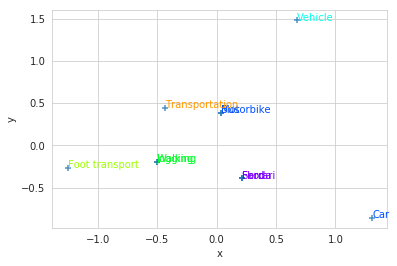

In [0]:
vectors = {node: [node in edge for edge in G.edges] for node in G.nodes}
plot_vectors(vectors.keys(), list(vectors.values()),[clusters_idx[word] for word in vectors] )
similar_words(vectors["Ferrari"],vectors)

## Adjacency matrix (Node-Node)
cons:  only captures local relations but more global than Incidence matrix.  It is larger than incidence matrix as number of nodes are typically more than number of edges

In [0]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]], dtype=int64)

[(0.0, 'Ferrari'),
 (0.3675444679663241, 'Car'),
 (0.5, 'Ford'),
 (0.5, 'Skoda'),
 (0.683772233983162, 'Vehicle'),
 (1.0, 'Bus'),
 (1.0, 'Foot transport'),
 (1.0, 'Jogging'),
 (1.0, 'Motorbike'),
 (1.0, 'Transportation'),
 (1.0, 'Walking')]

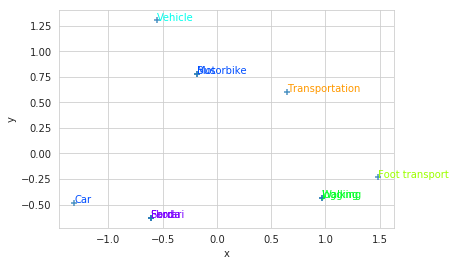

In [0]:
vectors = {start_node: [start_node in G.neighbors(end_node) or start_node == end_node for end_node in G.nodes] for start_node in G.nodes}
plot_vectors(vectors.keys(), list(vectors.values()),[clusters_idx[word] for word in vectors] )
similar_words(vectors["Ferrari"],vectors)

## Modified Adjacency Matrix (best)
modified so that the values are not boolean, rather they are the minimum number of steps between the two nodes.  Now vector captures global relations - no matter how distant  

Cons: vector is length of no. of nodes in graph

[(0.0, 'Ferrari'),
 (0.13162962411855683, 'Car'),
 (0.23813067420747147, 'Ford'),
 (0.23813067420747147, 'Skoda'),
 (0.24019239616863164, 'Vehicle'),
 (0.3208853710611824, 'Bus'),
 (0.3208853710611824, 'Motorbike'),
 (0.326623291514211, 'Transportation'),
 (0.4104325952473169, 'Foot transport'),
 (0.46328486049457773, 'Jogging'),
 (0.46328486049457773, 'Walking')]

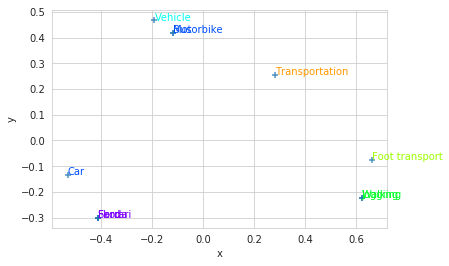

In [0]:
vectors = {start_node: [1/len(nx.shortest_path(G, source=start_node, target=end_node)) for end_node in G.nodes] for start_node in G.nodes}
plot_vectors(vectors.keys(), list(vectors.values()),[clusters_idx[word] for word in vectors] )
similar_words(vectors["Ferrari"],vectors)

In [0]:
similar_words(vectors["Car"],vectors)

[(0.0, 'Car'),
 (0.13162962411855683, 'Ferrari'),
 (0.13162962411855683, 'Ford'),
 (0.13162962411855683, 'Skoda'),
 (0.13435519625480485, 'Vehicle'),
 (0.23896209735645502, 'Bus'),
 (0.23896209735645502, 'Motorbike'),
 (0.24796602743686647, 'Transportation'),
 (0.352649158506377, 'Foot transport'),
 (0.4161632096092266, 'Jogging'),
 (0.4161632096092266, 'Walking')]

# Real Data
lets test out our methods using large, realworld graphs

## WordNet (Directed Graph)

In [0]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

 Index every synset in wordnet

In [0]:
synset_idx = {synset:i for i,synset in enumerate(wn.all_synsets())}

Create a vocab_vector dictionary (using only parent nodes)

In [0]:
vectors = {}
for synset in synset_idx:
  vec = {synset_idx[parent_synset] for parent_synset in synset.closure(lambda s: s.hypernyms())}
  for word in synset.lemma_names():
    vectors[word] = vec

Create alternative vocab_vector dictionary (using every relation)

In [0]:
def everything_about(synset):
  return set(synset.closure(lambda s: s.hypernyms())) | \
  set(synset.closure(lambda s: s.hyponyms()))  | \
  set(synset.closure(lambda s: s.part_meronyms()))  | \
  set(synset.closure(lambda s: s.substance_meronyms()))  | \
  set(synset.closure(lambda s: s.member_meronyms()))  | \
  set(synset.closure(lambda s: s.part_holonyms()))  | \
  set(synset.closure(lambda s: s.substance_holonyms()))  | \
  set(synset.closure(lambda s: s.member_holonyms()))  | \
  set(synset.closure(lambda s: s.topic_domains()))  | \
  set(synset.closure(lambda s: s.region_domains()))  | \
  set(synset.closure(lambda s: s.usage_domains()))  | \
  set(synset.closure(lambda s: s.entailments()))  | \
  set(synset.closure(lambda s: s.causes()))  | \
  set(synset.closure(lambda s: s.also_sees()))  | \
  set(synset.closure(lambda s: s.verb_groups()))  | \
  set(synset.closure(lambda s: s.similar_tos()))

In [0]:
vectors2 = {}
for synset in synset_idx:
  vec = {synset_idx[related_synset] for related_synset in everything_about(synset)} 
  for word in synset.lemma_names():
    vectors2[word] = vec

## Wikipedia (Non-Directed Graph)

In [0]:
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')
dog.path_similarity(cat) #shortest path (via hypernym/hyponym relations only)

0.2